# Explore here

In [30]:
import pandas as pd
df= df = pd.read_csv('../data/raw/Latest_Data_Science_Salaries.csv')
df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020
3296,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,151000,United States,Large,2021
3297,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,105000,United States,Small,2020
3298,Business Data Analyst,Contract,Entry,Junior,100000,United States Dollar,United States,100000,United States,Large,2020


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


In [32]:
df = df.drop(['Salary', 'Salary Currency'], axis=1)

In [33]:
df

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...
3295,Data Scientist,Full-Time,Senior,Expert,United States,412000,United States,Large,2020
3296,Principal Data Scientist,Full-Time,Mid,Intermediate,United States,151000,United States,Large,2021
3297,Data Scientist,Full-Time,Entry,Junior,United States,105000,United States,Small,2020
3298,Business Data Analyst,Contract,Entry,Junior,United States,100000,United States,Large,2020


In [34]:
df['Experience Level'].unique()

array(['Senior', 'Mid', 'Executive', 'Entry'], dtype=object)

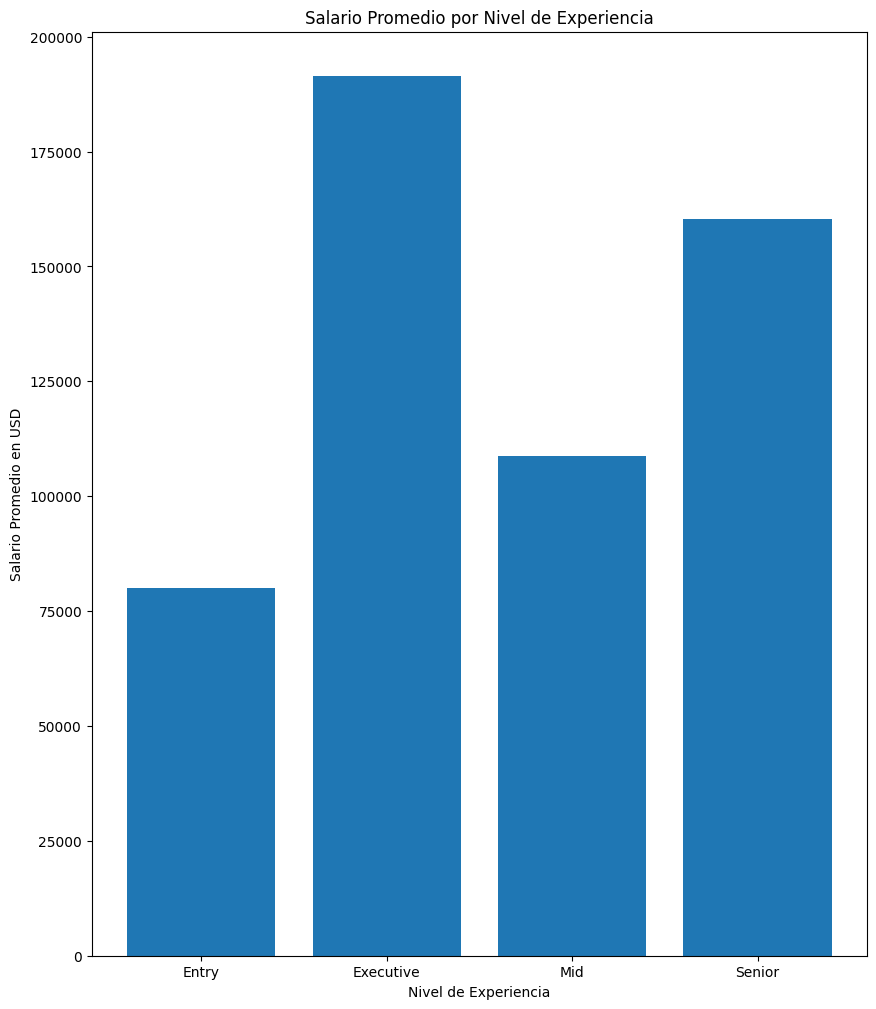

In [35]:
import matplotlib.pyplot as plt

agrupado = df.groupby('Experience Level')['Salary in USD'].mean().reset_index()
valores_x = agrupado['Experience Level']
valores_y = agrupado['Salary in USD']

plt.figure(figsize=(10, 12))
plt.bar(x=valores_x, height=valores_y)

plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario Promedio en USD')
plt.title('Salario Promedio por Nivel de Experiencia')

plt.show()

In [36]:
dic={
    'Entry':0,
    'Executive':1,
    'Mid':2,
    'Senior':3
}


In [37]:
df["Experience Level"].replace(dic,inplace=True)
df

/tmp/ipykernel_1933/3293431767.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Experience Level"].replace(dic,inplace=True)
/tmp/ipykernel_1933/3293431767.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Experience Level"].replace(dic,inplace=True)


,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,3,Expert,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,3,Expert,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,3,Expert,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,3,Expert,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,3,Expert,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...
3295,Data Scientist,Full-Time,3,Expert,United States,412000,United States,Large,2020
3296,Principal Data Scientist,Full-Time,2,Intermediate,United States,151000,United States,Large,2021
3297,Data Scientist,Full-Time,0,Junior,United States,105000,United States,Small,2020
3298,Business Data Analyst,Contract,0,Junior,United States,100000,United States,Large,2020


In [38]:
df['Employment Type'].unique()

array(['Full-Time', 'Contract', 'Part-Time', 'Freelance'], dtype=object)

<Axes: xlabel='Employment Type'>

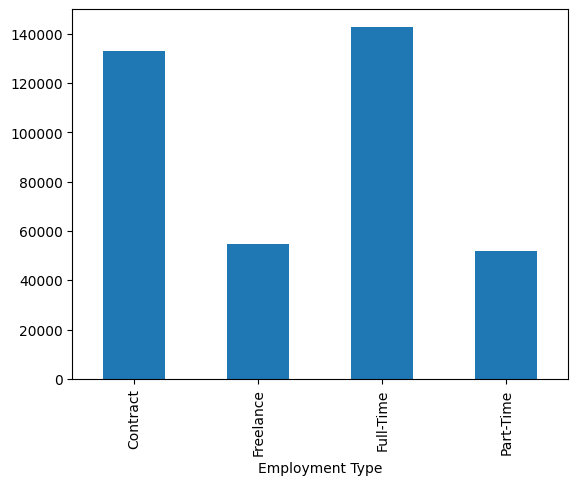

In [39]:
df.groupby('Employment Type')['Salary in USD'].mean().plot.bar()

In [40]:
dic_et={'Part-Time':0,'Full-Time':1,'Freelance':2,'Contract':3}

In [41]:
df['Company Size'].unique()

array(['Medium', 'Large', 'Small'], dtype=object)

<Axes: xlabel='Company Size'>

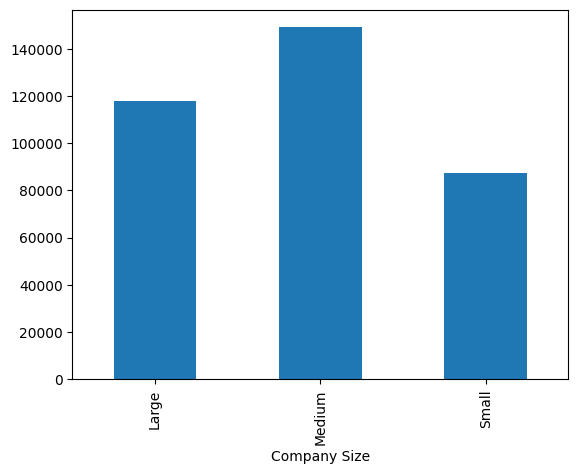

In [42]:
df.groupby('Company Size')['Salary in USD'].mean().plot.bar()

In [43]:
dic_cs={'Small':0, 'Large':1, 'Medium':2}

In [44]:
df['Employment Type'].replace(dic_et, inplace=True)
df['Company Size'].replace(dic_cs, inplace=True)
df

/tmp/ipykernel_1933/420091287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment Type'].replace(dic_et, inplace=True)
/tmp/ipykernel_1933/420091287.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Employment Type'].replace(dic_et, inplace=True)
/tmp/ipykernel_1933/420091287.py

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,1,3,Expert,United States,210000,United States,2,2023
1,Data Engineer,1,3,Expert,United States,165000,United States,2,2023
2,Data Engineer,1,3,Expert,United States,185900,United States,2,2023
3,Data Engineer,1,3,Expert,United States,129300,United States,2,2023
4,Data Scientist,1,3,Expert,United States,140000,United States,2,2023
...,...,...,...,...,...,...,...,...,...
3295,Data Scientist,1,3,Expert,United States,412000,United States,1,2020
3296,Principal Data Scientist,1,2,Intermediate,United States,151000,United States,1,2021
3297,Data Scientist,1,0,Junior,United States,105000,United States,0,2020
3298,Business Data Analyst,3,0,Junior,United States,100000,United States,1,2020


In [45]:
df['employee_residence_num'], unique_values=pd.factorize(df['Employee Residence'])
df

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year,employee_residence_num
0,Data Engineer,1,3,Expert,United States,210000,United States,2,2023,0
1,Data Engineer,1,3,Expert,United States,165000,United States,2,2023,0
2,Data Engineer,1,3,Expert,United States,185900,United States,2,2023,0
3,Data Engineer,1,3,Expert,United States,129300,United States,2,2023,0
4,Data Scientist,1,3,Expert,United States,140000,United States,2,2023,0
...,...,...,...,...,...,...,...,...,...,...
3295,Data Scientist,1,3,Expert,United States,412000,United States,1,2020,0
3296,Principal Data Scientist,1,2,Intermediate,United States,151000,United States,1,2021,0
3297,Data Scientist,1,0,Junior,United States,105000,United States,0,2020,0
3298,Business Data Analyst,3,0,Junior,United States,100000,United States,1,2020,0


In [46]:
unique_values

Index(['United States', 'United Kingdom', 'Germany', 'India',
       'Korea, Republic of', 'Spain', 'Estonia', 'France', 'Philippines',
       'Canada', 'Australia', 'Turkey', 'Portugal', 'Brazil', 'Belgium',
       'Switzerland', 'Andorra', 'Netherlands', 'Ecuador', 'Peru', 'Mexico',
       'Moldova, Republic of', 'Nigeria', 'Saudi Arabia', 'Colombia', 'Ghana',
       'Poland', 'Norway', 'Argentina', 'Egypt', 'Uzbekistan', 'Georgia',
       'Japan', 'South Africa', 'Italy', 'Hong Kong',
       'Central African Republic', 'Finland', 'Ukraine', 'Ireland', 'Israel',
       'Austria', 'Singapore', 'Sweden', 'Slovenia', 'Thailand', 'Croatia',
       'Kuwait', 'Cyprus', 'Armenia', 'Bosnia and Herzegovina', 'Kenya',
       'Latvia', 'Romania', 'Pakistan', 'Lithuania',
       'Iran, Islamic Republic of', 'American Samoa', 'Hungary', 'China',
       'Costa Rica', 'Chile', 'Puerto Rico', 'Greece', 'Denmark',
       'Bolivia, Plurinational State of', 'Dominican Republic', 'Indonesia',
       'Un

In [47]:
dic_er=dict(enumerate(unique_values))
dic_er

{0: 'United States',
 1: 'United Kingdom',
 2: 'Germany',
 3: 'India',
 4: 'Korea, Republic of',
 5: 'Spain',
 6: 'Estonia',
 7: 'France',
 8: 'Philippines',
 9: 'Canada',
 10: 'Australia',
 11: 'Turkey',
 12: 'Portugal',
 13: 'Brazil',
 14: 'Belgium',
 15: 'Switzerland',
 16: 'Andorra',
 17: 'Netherlands',
 18: 'Ecuador',
 19: 'Peru',
 20: 'Mexico',
 21: 'Moldova, Republic of',
 22: 'Nigeria',
 23: 'Saudi Arabia',
 24: 'Colombia',
 25: 'Ghana',
 26: 'Poland',
 27: 'Norway',
 28: 'Argentina',
 29: 'Egypt',
 30: 'Uzbekistan',
 31: 'Georgia',
 32: 'Japan',
 33: 'South Africa',
 34: 'Italy',
 35: 'Hong Kong',
 36: 'Central African Republic',
 37: 'Finland',
 38: 'Ukraine',
 39: 'Ireland',
 40: 'Israel',
 41: 'Austria',
 42: 'Singapore',
 43: 'Sweden',
 44: 'Slovenia',
 45: 'Thailand',
 46: 'Croatia',
 47: 'Kuwait',
 48: 'Cyprus',
 49: 'Armenia',
 50: 'Bosnia and Herzegovina',
 51: 'Kenya',
 52: 'Latvia',
 53: 'Romania',
 54: 'Pakistan',
 55: 'Lithuania',
 56: 'Iran, Islamic Republic of',


In [48]:
#con esta formula ya me arroja los valores ya numerados en el diccionario
dic_er={valor:codigo for codigo,valor in dic_er.items()}
dic_er

{'United States': 0,
 'United Kingdom': 1,
 'Germany': 2,
 'India': 3,
 'Korea, Republic of': 4,
 'Spain': 5,
 'Estonia': 6,
 'France': 7,
 'Philippines': 8,
 'Canada': 9,
 'Australia': 10,
 'Turkey': 11,
 'Portugal': 12,
 'Brazil': 13,
 'Belgium': 14,
 'Switzerland': 15,
 'Andorra': 16,
 'Netherlands': 17,
 'Ecuador': 18,
 'Peru': 19,
 'Mexico': 20,
 'Moldova, Republic of': 21,
 'Nigeria': 22,
 'Saudi Arabia': 23,
 'Colombia': 24,
 'Ghana': 25,
 'Poland': 26,
 'Norway': 27,
 'Argentina': 28,
 'Egypt': 29,
 'Uzbekistan': 30,
 'Georgia': 31,
 'Japan': 32,
 'South Africa': 33,
 'Italy': 34,
 'Hong Kong': 35,
 'Central African Republic': 36,
 'Finland': 37,
 'Ukraine': 38,
 'Ireland': 39,
 'Israel': 40,
 'Austria': 41,
 'Singapore': 42,
 'Sweden': 43,
 'Slovenia': 44,
 'Thailand': 45,
 'Croatia': 46,
 'Kuwait': 47,
 'Cyprus': 48,
 'Armenia': 49,
 'Bosnia and Herzegovina': 50,
 'Kenya': 51,
 'Latvia': 52,
 'Romania': 53,
 'Pakistan': 54,
 'Lithuania': 55,
 'Iran, Islamic Republic of': 56,


In [49]:
df['Company Location_num'], unique_values=pd.factorize(df['Company Location'])
dic_cl=dict(enumerate(unique_values))
dic_cl={valor:codigo for codigo, valor in dic_cl.items()}
dic_cl

{'United States': 0,
 'United Kingdom': 1,
 'Germany': 2,
 'Sweden': 3,
 'India': 4,
 'Korea, Republic of': 5,
 'Spain': 6,
 'Estonia': 7,
 'France': 8,
 'Philippines': 9,
 'Canada': 10,
 'Australia': 11,
 'Turkey': 12,
 'Portugal': 13,
 'Brazil': 14,
 'Switzerland': 15,
 'Andorra': 16,
 'Netherlands': 17,
 'Ecuador': 18,
 'Mexico': 19,
 'Israel': 20,
 'Nigeria': 21,
 'Saudi Arabia': 22,
 'Colombia': 23,
 'Poland': 24,
 'Norway': 25,
 'Ghana': 26,
 'Argentina': 27,
 'Japan': 28,
 'Russian Federation': 29,
 'South Africa': 30,
 'Italy': 31,
 'Hong Kong': 32,
 'Central African Republic': 33,
 'Finland': 34,
 'Ukraine': 35,
 'Ireland': 36,
 'Singapore': 37,
 'Slovenia': 38,
 'Thailand': 39,
 'Croatia': 40,
 'Armenia': 41,
 'Bosnia and Herzegovina': 42,
 'Kenya': 43,
 'Latvia': 44,
 'Romania': 45,
 'Pakistan': 46,
 'Lithuania': 47,
 'Iran, Islamic Republic of': 48,
 'Bahamas': 49,
 'Hungary': 50,
 'Austria': 51,
 'Puerto Rico': 52,
 'American Samoa': 53,
 'Greece': 54,
 'Denmark': 55,
 'Be

In [50]:
df

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year,employee_residence_num,Company Location_num
0,Data Engineer,1,3,Expert,United States,210000,United States,2,2023,0,0
1,Data Engineer,1,3,Expert,United States,165000,United States,2,2023,0,0
2,Data Engineer,1,3,Expert,United States,185900,United States,2,2023,0,0
3,Data Engineer,1,3,Expert,United States,129300,United States,2,2023,0,0
4,Data Scientist,1,3,Expert,United States,140000,United States,2,2023,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3295,Data Scientist,1,3,Expert,United States,412000,United States,1,2020,0,0
3296,Principal Data Scientist,1,2,Intermediate,United States,151000,United States,1,2021,0,0
3297,Data Scientist,1,0,Junior,United States,105000,United States,0,2020,0,0
3298,Business Data Analyst,3,0,Junior,United States,100000,United States,1,2020,0,0


In [51]:
#eliminamos columnas que no estan factorizadas y no nececitamos
df.drop(['Company Location','Employee Residence','Job Title','Expertise Level'],axis=1, inplace=True)

In [52]:
x=df.drop(['Salary in USD'],axis=1)
y=df['Salary in USD']

from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train

,Employment Type,Experience Level,Company Size,Year,employee_residence_num,Company Location_num
2373,1,3,2,2022,0,0
2522,1,3,2,2022,0,0
69,1,3,2,2023,0,0
2994,1,2,1,2022,12,13
2887,1,2,0,2022,0,0
...,...,...,...,...,...,...
1095,1,3,2,2023,7,8
1130,1,2,2,2023,0,0
1294,1,0,2,2023,0,0
860,1,3,2,2023,0,0


In [53]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

model1 = RandomForestRegressor(random_state=42)
model2 = XGBRegressor()

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)  

y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test) 

print(f'rmse modelo 1: {root_mean_squared_error(y_test, y_pred1)} r2: {r2_score(y_test, y_pred1)}')
print(f'rmse modelo 2: {root_mean_squared_error(y_test, y_pred2)} r2: {r2_score(y_test, y_pred2)}')

rmse modelo 1: 57259.89203254347 r2: 0.3041157984198821
rmse modelo 2: 58037.33984375 r2: 0.28509074449539185


In [54]:
model2.save_model('../xgboost_model.json')

In [55]:
import json

with open('../data/processed/dic_cl.json', 'w', encoding='utf-8') as archivo:
    json.dump(dic_cl, archivo, ensure_ascii=False, indent=4)  # company location

with open('../data/processed/dic.json', 'w', encoding='utf-8') as archivo:
    json.dump(dic, archivo, ensure_ascii=False, indent=4)  # experience level

with open('../data/processed/dic_et.json', 'w', encoding='utf-8') as archivo:
    json.dump(dic_et, archivo, ensure_ascii=False, indent=4)  # employment type

with open('../data/processed/dic_er.json', 'w', encoding='utf-8') as archivo:
    json.dump(dic_er, archivo, ensure_ascii=False, indent=4)  # employee residence

with open('../data/processed/dic_cs.json', 'w', encoding='utf-8') as archivo:
    json.dump(dic_cs, archivo, ensure_ascii=False, indent=4)  # company size


In [56]:
x_train.columns

Index(['Employment Type', 'Experience Level', 'Company Size', 'Year',
       'employee_residence_num', 'Company Location_num'],
      dtype='object')